In [1]:
library(ggplot2)
library(gridExtra)
library(repr)

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

## Estimation of a dissociation constant

In [2]:
exp_data <- data.frame(b0 = c(0.0003, 0.0013, 0.0025, 0.0035, 0.0050, 0.0100, 0.0200, 0.0300), 
                       f = c(0.1317, 0.3400, 0.4783, 0.5650, 0.6100, 0.7917, 0.9283, 0.8467))
exp_data

b0,f
<dbl>,<dbl>
0.0003,0.1317
0.0013,0.3400
0.0025,0.4783
0.0035,0.5650
0.0050,0.6100
0.0100,0.7917
0.0200,0.9283
0.0300,0.8467


In [3]:
sol_f <- function(b0, a0, kd) (a0 + b0 + kd - sqrt(a0^2 - 2*a0*(b0 - kd) + (b0 + kd)^2)) / (2*a0)

ssr <- function(x, a0, data){
    
    b0 = data[['b0']]
    f = data[['f']]
    n <- length(f)
    
    sum <- 0
    for (i in 1:n){
        
        b <- b0[i]
        estimated_f <- sol_f(b, a0, x)
        sum <- sum + (estimated_f - f[i])^2
        
    }
    return(sum)
}

In [4]:
optimize(ssr, c(0, 10), 
         a0 = 1.07*10^(-6), 
         data = exp_data)

$minimum
[1] 0.002718956

$objective
[1] 0.01001113

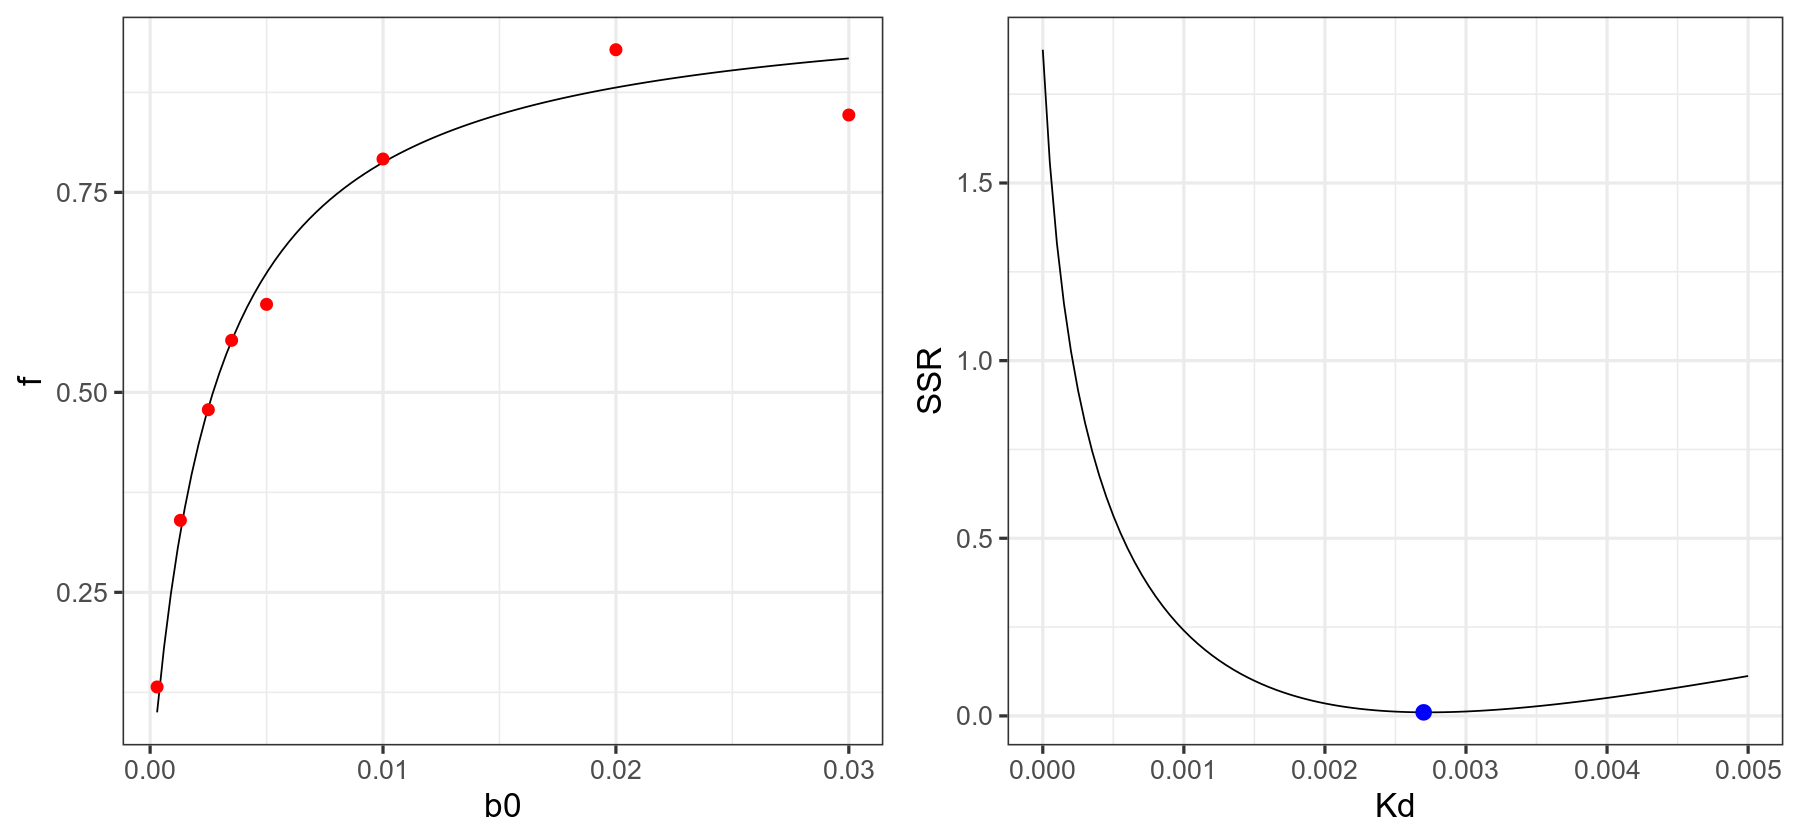

In [5]:
pf <- ggplot(data = exp_data, mapping = aes(x = b0)) + 
    stat_function(fun = sol_f, 
                  args = list(a0 = 1.07*10^(-6), kd = 0.0027)) +
    geom_point(mapping = aes(x=b0, y=f), color = 'red', size=3) +
    theme_bw(base_size = 20)

pSSR <- ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
    stat_function(fun = ssr, 
                  args = list(a0 = 1.07*10^(-6), data = exp_data)) + 
    xlim(0, 0.005) + 
    geom_point(aes(x = 0.0027, y = 0.01), colour="blue", size=4) +
    xlab("Kd") + ylab("SSR") +
    theme_bw(base_size = 20)

fig(15, 7)
grid.arrange(pf, pSSR, ncol = 2, nrow = 1)

## Lotka-Volterra predator-prey model

In [6]:
library(deSolve)

In [7]:
LVmodel <- function(time, state, params){
    with(
        as.list(c(state, params)),
        {
            dXdt <- a*X - b*X*Y
            dYdt <- d*X*Y - c*Y
            return(list(c(dXdt, dYdt)))
        }
    )
}

In [8]:
pars <- c(a=1, b=0.5, c=0.25, d=0.43)
init <- c(X = runif(1, min=1, max=2), Y = runif(1, min=1, max=2))
t <- seq(0, 30, 0.1)

solution <- ode(y = init, times = t, func = LVmodel, parms = pars)
solution_df <- as.data.frame(solution)
head(solution_df)

,time,X,Y
,<dbl>,<dbl>,<dbl>
1,0.0,1.393914,1.324131
2,0.1,1.440103,1.372584
3,0.2,1.484059,1.425572
4,0.3,1.525128,1.483318
5,0.4,1.562624,1.546017
6,0.5,1.595827,1.613822


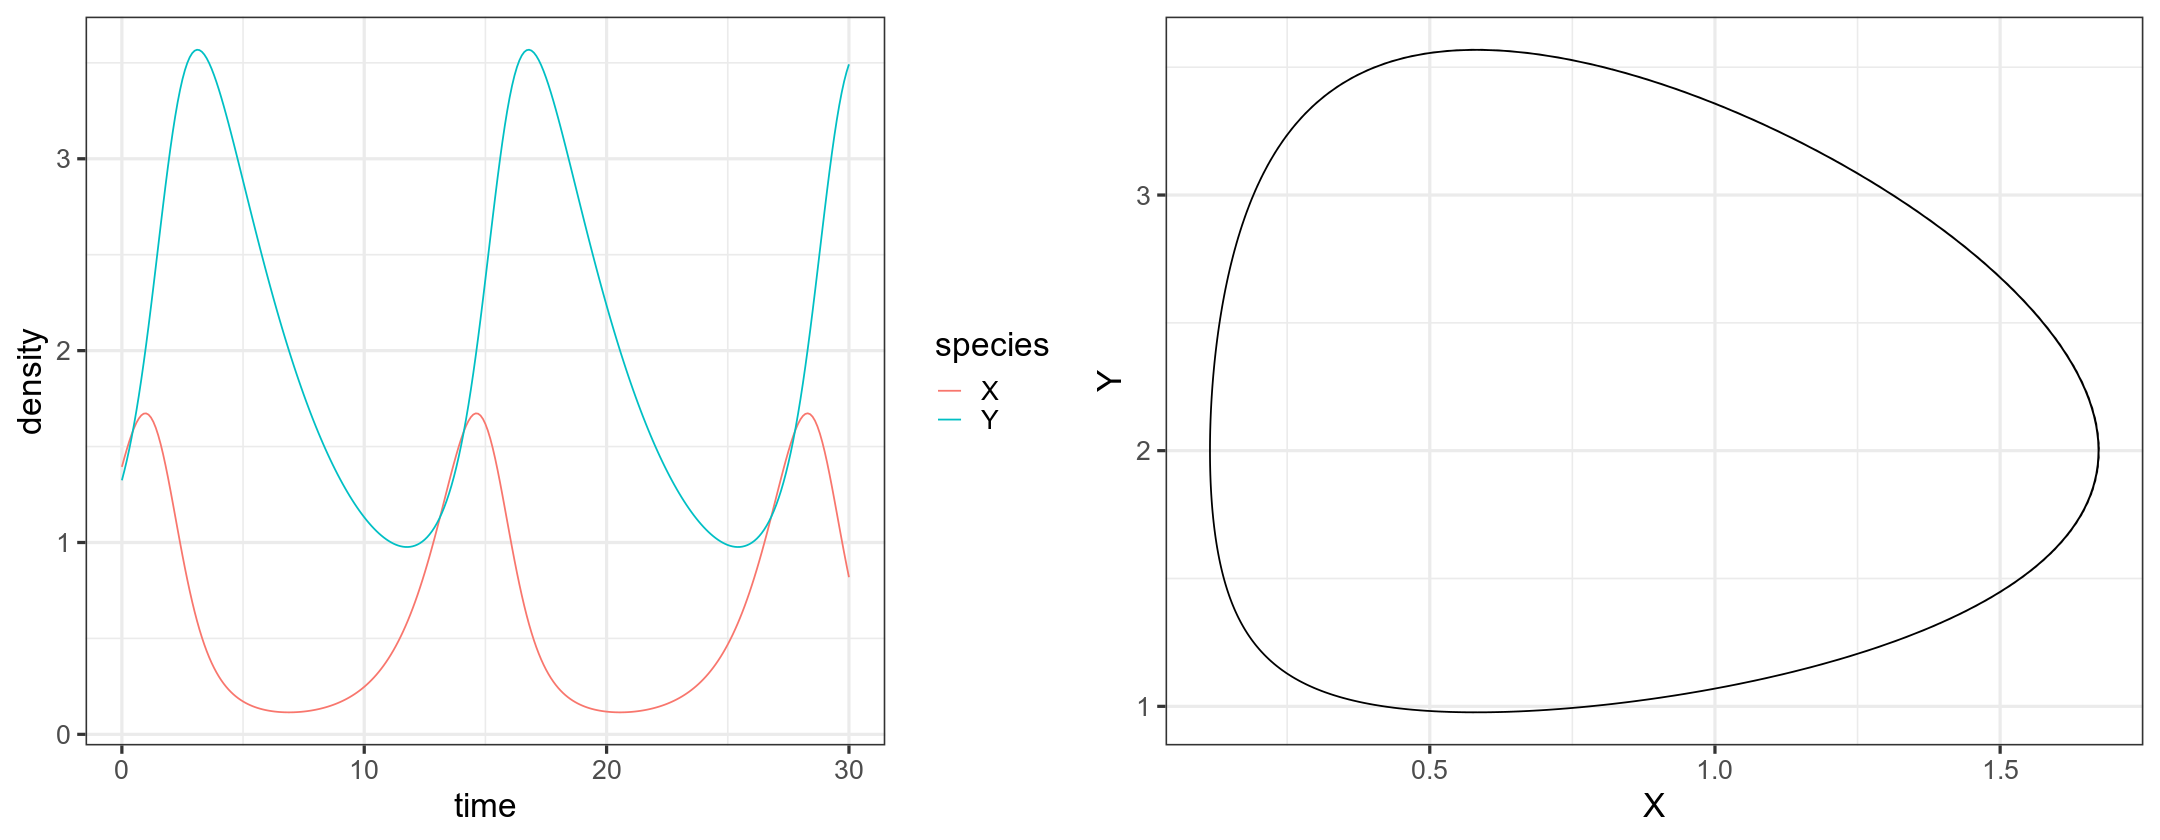

In [11]:
library(tidyr)
solution_df_long <- gather(solution_df, key = "species", value = "density", X, Y)

timePlot <- ggplot(data = solution_df_long, mapping = aes(x = time, y = density, color = species)) + geom_line() +
            theme_bw(base_size=20)
phasePlot <- ggplot(data = solution_df, mapping = aes(x = X, y = Y)) + geom_path() +
            theme_bw(base_size=20)

fig(18, 7)
grid.arrange(timePlot, phasePlot, ncol = 2, nrow = 1)